In [1]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from numpy import linalg as LA

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


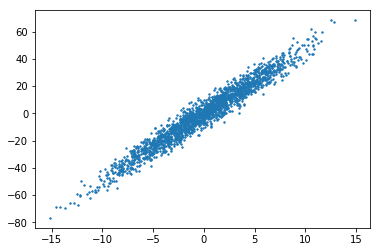

In [5]:
d = 2
m = 2000
delta = np.eye(d)
delta[-1, -1] = 500
delta[-1, 0] = 100
X = np.random.multivariate_normal(np.zeros(d), delta, m)
plt.scatter(X[:, 0], X[:, 1], cmap=matplotlib.colors.ListedColormap("blue"), s=2)
plt.show()

In [6]:
X.shape

(2000, 2)

In [7]:
def likelihood(X, lamb, psi, mu):
    m, n = X.shape
    l = 0
    for i in range(m):
        l += np.log(1/((2*np.pi)**(n/2)) * np.linalg.det(np.dot(lamb, lamb.T) + psi) * np.exp(np.dot(np.dot(X[i, :]-mu, np.linalg.inv(np.dot(lamb, lamb.T) + psi)), X[i, :]-mu)))
    return l/m

In [8]:
d = 1
n = X.shape[-1]
mu = np.random.random_sample(n) * 0.01
lamb = np.random.random_sample((n, d)) * 0.01
psi = np.random.random((n, n)) * 0.01

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  """


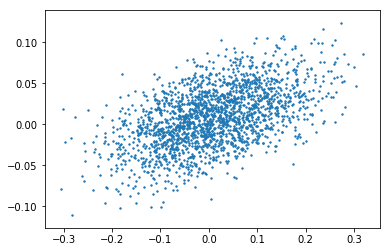

In [10]:
num = 2000
z = np.random.multivariate_normal(np.zeros(d), np.eye(d), num)
X_gen = []
for i in range(num):
    x = np.random.multivariate_normal(np.dot(lamb, z[i, :]) + mu, psi)
    X_gen.append(x)
X_gen = np.array(X_gen)

fig = plt.figure()
#ax = Axes3D(fig)
plt.scatter(X_gen[:, 0], X_gen[:, 1], cmap=matplotlib.colors.ListedColormap("blue"), s=2)
plt.show()

In [11]:
max_iter = 10000

for i in range(max_iter):
    # E step
    if i % int(max_iter/10) == 0:
        print(likelihood(X, lamb, psi, mu))
    mu_zi_xi = np.dot(np.dot(lamb.T, np.linalg.inv(np.dot(lamb, lamb.T) + psi)), (X-mu).T).T
    delta_zi_xi = np.eye(d) - np.dot(np.dot(lamb.T, np.linalg.inv(np.dot(lamb, lamb.T) + psi)), lamb)

    # M step
    temp1 = np.zeros((n, d))
    temp2 = np.zeros((d, d))
    for i in range(X.shape[-1]):
        temp1 += np.outer((X-mu)[i, :], mu_zi_xi[i, :])
        temp2 += np.outer(mu_zi_xi[i, :], mu_zi_xi[i, :]) + delta_zi_xi
    lamb = np.dot(temp1, np.linalg.inv(temp2))

    mu = 1/X.shape[0] * np.sum(X, axis=0)

    temp1 = np.zeros((n, n))
    temp2 = np.zeros((n, n))
    temp3 = np.zeros((n, n))
    temp4 = np.zeros((n, n))
    for i in range(X.shape[-1]):
        temp1 += np.outer(X[i, :], X[i, :])
        temp2 += np.dot(np.outer(X[i, :], mu_zi_xi[i, :]), lamb.T)
        temp3 += np.dot(lamb, np.outer(mu_zi_xi[i, :], X[i, :]))
        temp4 += np.dot(np.dot(lamb, np.outer(mu_zi_xi[i, :], mu_zi_xi[i, :]) + delta_zi_xi), lamb.T)

    phi = 1/X.shape[-1] * (temp1 - temp2 - temp3 + temp4)

    psi = np.zeros((n, n))
    np.fill_diagonal(psi, np.diag(phi))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


inf
11.744826353860306
11.743063804566289
11.743028442921595
11.743027728297275
11.743027713853463
11.7430277135613
11.743027713555506
11.743027713555543
11.743027713555543


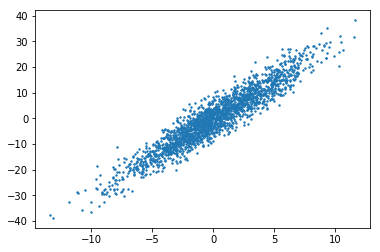

In [13]:
num = 2000
z = np.random.multivariate_normal(np.zeros(d), np.eye(d), num)
X_gen = []
for i in range(num):
    x = np.random.multivariate_normal(np.dot(lamb, z[i, :]) + mu, psi)
    X_gen.append(x)
X_gen = np.array(X_gen)

fig = plt.figure()
#ax = Axes3D(fig)
plt.scatter(X_gen[:, 0], X_gen[:, 1], cmap=matplotlib.colors.ListedColormap("blue"), s=2)
plt.show()